In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import requests
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

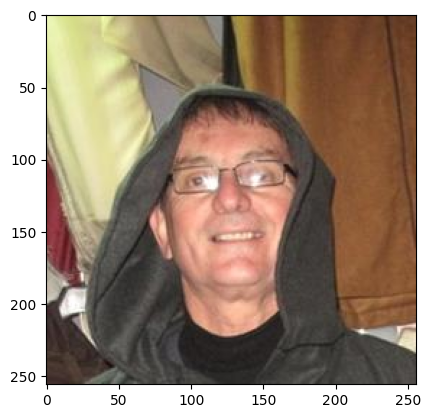

In [2]:
image = cv2.imread("E:\\Data Set\\Dataset\\Train\\Real\\real_0.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
train = ImageDataGenerator(rescale=1/255)
valid = ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset = train.flow_from_directory("E:\Data Set\deep fake\Train",target_size=(200,200),batch_size=3,class_mode='binary')

Found 2019 images belonging to 2 classes.


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19140\4234180120.py:1: SyntaxWarning: invalid escape sequence '\D'
  train_dataset = train.flow_from_directory("E:\Data Set\deep fake\Train",target_size=(200,200),batch_size=3,class_mode='binary')


In [6]:
train_dataset.class_indices

{'Fake': 0, 'Real': 1}

In [8]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation="relu"),
    tf.keras.layers.Dense(1 , activation="sigmoid")])

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss="binary_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=["accuracy"])
model_fit = model.fit(train_dataset, steps_per_epoch=200, epochs=20)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
194/200 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6385 - loss: 1.3032

KeyboardInterrupt: 

In [1]:
val_path = r"E:\Data Set\deep fake\valid"

for i in os.listdir(val_path):
    img = load_img(val_path+'//'+ i,target_size=(200,200))
    

    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val= model.predict(images)

    if val==0:
        print("Fake Images")
    else:
        print("Real Image")

NameError: name 'os' is not defined